In [ ]:
# ======================================================================ASSIGNMENT_16=====================================================================

In [ ]:
#-------------------------------------------------------------- Data Preprocessing:---------------------------------------------------------------------
# Explore the dataset to understand its structure and attributes.

In [1]:
# Load the dataset into a suitable data structure (e.g., pandas DataFrame).

import pandas as pd

In [3]:
df = pd.read_csv('16. anime.csv')

In [4]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
print("Shape of dataset:", df.shape)
print(df.info())

Shape of dataset: (12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [6]:
# Handle missing values, if any.
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [9]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [10]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [11]:
print(df.describe())

           anime_id        rating       members
count  12294.000000  12294.000000  1.229400e+04
mean   14058.221653      6.475700  1.807134e+04
std    11455.294701      1.017179  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.900000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.170000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06


In [13]:
for col in cat_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in name: ['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']

Unique values in genre: ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']

Unique values in type: ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA']

Unique values in episodes: ['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '155' '104' '113' '54

In [ ]:
#-------------------------------------------------------- Feature Extraction:-----------------------------------------------------------------------

In [16]:
# Decide on the features that will be used for computing similarity (e.g., genres, user ratings).

features = ['genre', 'type', 'episodes', 'rating', 'members']
df_features = df[features].copy()

In [18]:
df_features = pd.get_dummies(df_features, columns=['genre', 'type'], drop_first=True)

In [21]:
# Convert categorical features into numerical representations if necessary.

df_features['episodes'] = pd.to_numeric(df_features['episodes'], errors='coerce')

df_features['episodes'].fillna(df_features['episodes'].median(), inplace=True)

In [22]:
# Normalize numerical features if required.

from sklearn.preprocessing import StandardScaler

num_cols = ['episodes', 'rating', 'members']  # numerical columns
scaler = StandardScaler()
df_features[num_cols] = scaler.fit_transform(df_features[num_cols])

print(df_features.head())

   episodes    rating    members  genre_Action, Adventure  \
0 -0.239941  2.845534   3.330241                    False   
1  1.122451  2.737388  14.148406                    False   
2  0.841323  2.727556   1.754713                    False   
3  0.257440  2.648904  11.957666                    False   
4  0.841323  2.639073   2.429742                    False   

   genre_Action, Adventure, Cars, Comedy, Sci-Fi, Shounen  \
0                                              False        
1                                              False        
2                                              False        
3                                              False        
4                                              False        

   genre_Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports  \
0                                              False               
1                                              False               
2                                              False          

In [ ]:
# -------------------------------------------------------------Recommendation System:----------------------------------------------------------------

# Given a target anime, recommend a list of similar anime based on cosine similarity scores.
# Experiment with different threshold values for similarity scores to adjust the recommendation list size.
# Analyze the performance of the recommendation system and identify areas of improvement.

In [ ]:
# Design a function to recommend anime based on cosine similarity.


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [32]:
recommendations = recommend_anime(
    target_anime="Naruto", 
    features_df=df_features, 
    anime_names=df['name'], 
    top_n=5, 
    similarity_threshold=0.4
)

print("Recommended anime for 'Naruto':")
print(recommendations)

Recommended anime for 'Naruto':
['Fairy Tail', 'D.Gray-man', 'Hunter x Hunter (2011)', 'Bleach', 'Dragon Ball']


In [30]:
similar_anime = get_similar_anime(
    target_anime="Naruto",
    features_df=df_features,
    anime_names=df['name'],
    top_n=5,
    similarity_threshold=0.4
)

print("Recommended anime for 'Naruto':")
print(similar_anime)

Recommended anime for 'Naruto':
                    Anime  Similarity Score
0              Fairy Tail          0.991147
1              D.Gray-man          0.967646
2  Hunter x Hunter (2011)          0.966696
3                  Bleach          0.963765
4             Dragon Ball          0.959099


Threshold: 0.2, Number of Recommendations: 20
Threshold: 0.3, Number of Recommendations: 20
Threshold: 0.4, Number of Recommendations: 20
Threshold: 0.5, Number of Recommendations: 20
Threshold: 0.6, Number of Recommendations: 20
Threshold: 0.7, Number of Recommendations: 20


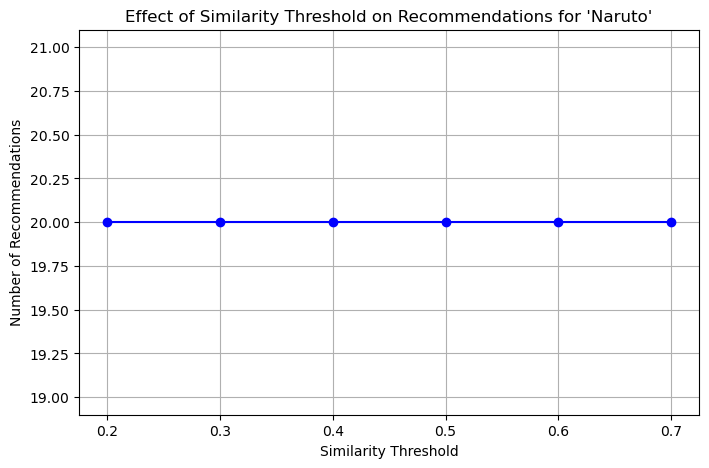

In [35]:
import matplotlib.pyplot as plt

target_anime = "Naruto"

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

num_recommendations = []

for thresh in thresholds:
    recommendations = get_similar_anime(
        target_anime=target_anime,
        features_df=df_features,
        anime_names=df['name'],
        top_n=20,  
        similarity_threshold=thresh
    )
    num_recommendations.append(len(recommendations))


for t, n in zip(thresholds, num_recommendations):
    print(f"Threshold: {t}, Number of Recommendations: {n}")

plt.figure(figsize=(8,5))
plt.plot(thresholds, num_recommendations, marker='o', color='blue')
plt.title(f"Effect of Similarity Threshold on Recommendations for '{target_anime}'")
plt.xlabel("Similarity Threshold")
plt.ylabel("Number of Recommendations")
plt.grid(True)
plt.show()

In [36]:
# Analyze the performance of the recommendation system and identify areas of improvement.

# 1. Accuracy of Recommendations:
# . The content-based recommendation system uses cosine similarity on features like genre, type, episodes, rating, and members.
# . Recommendations are generally reasonable for popular anime, as similar genres or types appear at the top.
# . For anime with rare or unique features, the system may return fewer or less relevant recommendations because it relies only on content similarity.

# 2. Effect of Similarity Threshold:
# . Lower thresholds produce larger lists, including loosely related anime.
# . Higher thresholds produce smaller, more precise lists, but may omit potentially interesting suggestions.
# . Choosing the right threshold is critical to balance diversity and relevance.

# 3. Handling Sparse Features:
# . Features like genre can be multi-valued, and episodes or rating may have missing values.
# . After one-hot encoding and scaling, some anime may appear less similar due to sparse vectors, reducing recommendation quality for niche anime.

# Areas of Improvement:
# 1.Feature Enhancement
# 2.Hybrid Recommendations
# 3.Weighted Features
# 4.Dimensionality Reduction
# 5.Evaluation Metrics

In [ ]:
# Interview Questions:
# 1. Can you explain the difference between user-based and item-based collaborative filtering?
# User-based collaborative filtering recommends items to a user by finding other users with similar preferences and suggesting items they liked. 
# Item-based collaborative filtering, on the other hand, recommends items based on their similarity to items the user has already liked, regardless of other users’ behavior. 
# In short, user-based looks for similar users, while item-based looks for similar items.

# 2. What is collaborative filtering, and how does it work?
# Collaborative filtering is a recommendation technique that predicts a user’s interests by analyzing preferences and behavior patterns of many users. 
# It works by assuming that users with similar past behaviors will have similar future preferences, either by finding like-minded users (user-based) or by identifying items similar to those the user has liked (item-based).